1. (2 points) Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.


In [0]:
import numpy as np
import pandas as pd


In [0]:
iris_df=pd.read_csv('https://raw.githubusercontent.com/trong-shen/Projects/master/Data%20Science%20and%20Python/iris.data',names=["sepal_length","sepal_width","petal_length","petal_width","class"],header=None) 


2. (3 points) Data inspection. Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data. Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in a different color (`seaborn.lmplot` is recommended for plotting).

In [27]:
print(iris_df.head())
print(iris_df.info())
iris_df['class'] = iris_df['class'].astype('category')
print(iris_df.describe())

#convert object type to categoricial 


   sepal_length  sepal_width  petal_length  petal_width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean

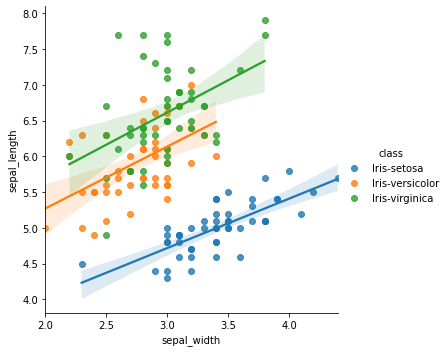

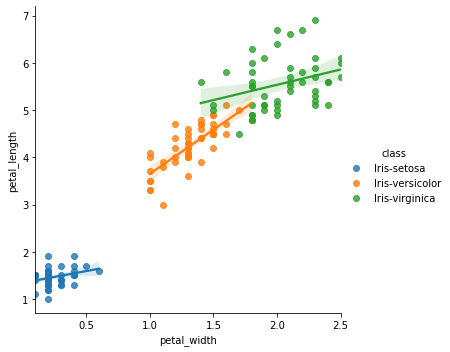

In [28]:
import seaborn as sn

#Plot using lmp,lot()
sn.set_style({'figure.facecolor':'white'})
sn.lmplot(x='sepal_width',y='sepal_length',data=iris_df[['sepal_width','sepal_length','class']],legend='True',hue='class')
sn.lmplot(x='petal_width',y='petal_length',data=iris_df[['petal_width','petal_length','class']],legend='True',hue='class')

3. (2 points) Prepare the data for classification. Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklearn` expects data as arrays, so convert extracted columns into arrays.




In [0]:
X=iris_df[['sepal_length','sepal_width','petal_width','petal_length']]
y=iris_df[['class']]

X_array=X.to_numpy()
y_array=y.to_numpy()


4. (1 point) Split the data into `train` and `test` using `sklearn` `train_test_split` function.


In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X_array,y_array,test_size=0.2,random_state=42)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120, 1)
(30, 4)
(30, 1)


5.(2 points) Run the fit using `KNeighborsClassifier` from `sklearn.neighbors`. First, instantiate the model and then run classifier on the training set.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

6.(3 points) Use the learning model to predict the class from features, run prediction on `X` from test part. Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test. Also, comparing these two arrays (predicted classes and test Y) count the numbers of correct predictions and predictions that were wrong. (`NumPy` array can be compared with `==` operator and `NumPy` operator `count_nonzero` counts the number of non-False).

In [33]:
y_hat=knn.predict(X_test)

print(accuracy_score(y_hat,y_test))

#Count number of correct predictions and number of incorrect predictions
def accuracy(y1,y2):
  comparison=np.equal(y1,y2[:,0])
  return(np.count_nonzero(y1==y2[:,0]),np.prod(comparison.shape)-np.count_nonzero(y1==y2[:,0]))

print(accuracy(y_hat,y_test))


1.0
(30, 0)


7.(2 points) Repeat the fit with the different number of neighbors (1, 3, 5, 10, 20, 50). Show how accuracy score and the number of correct predictions change with the number of neighbors.

In [34]:
for i in [1,3,5,10,20,50]:
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  y_hat=knn.predict(X_test)
  score=accuracy(y_hat,y_test)
  num_predictions=accuracy(y_hat,y_test)
  print('Number of Neighbours is', i, 'with',num_predictions[0],'correct predictions and ',num_predictions[1], 'of incorrect predictions','with an overal accuracy score of ', score)

Number of Neighbours is 1 with 30 correct predictions and  0 of incorrect predictions with an overal accuracy score of  (30, 0)
Number of Neighbours is 3 with 30 correct predictions and  0 of incorrect predictions with an overal accuracy score of  (30, 0)
Number of Neighbours is 5 with 30 correct predictions and  0 of incorrect predictions with an overal accuracy score of  (30, 0)
Number of Neighbours is 10 with 30 correct predictions and  0 of incorrect predictions with an overal accuracy score of  (30, 0)
Number of Neighbours is 20 with 30 correct predictions and  0 of incorrect predictions with an overal accuracy score of  (30, 0)
Number of Neighbours is 50 with 29 correct predictions and  1 of incorrect predictions with an overal accuracy score of  (29, 1)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A colum